<h1>Power spectrum from FFT</h1>
<p>This example shows how to obtain a power spectrum from the FFT analysis of a timeseries.</p>

In [1]:
#Import necessary libraries

import numpy as np
np.set_printoptions(precision=2, suppress=True)  # for compact output

import matplotlib.pyplot as plt

## 1. Generate signals we want to analyse.

We choose two sinusoidal signals of frequencies <i>frequency1</i> and <i>frequency2</i> sampled <i>N</i> times with sampling frequency <i>Fs</i>. For both signals we specify their Root Mean Squared voltage.

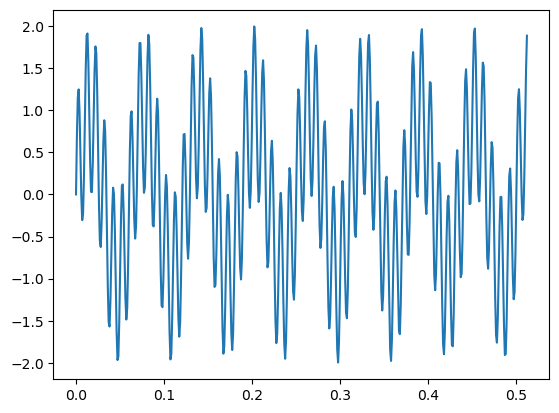

In [2]:
N = 512                     # Number of samples
Fs = 1000                   # Sampling frequency
Vrms = 0.7071               # Vrms
Vmax = np.sqrt(2.)*Vrms     # Conversion to amplitude

time = np.linspace(0, N/Fs, N)  # Generate 1024 time labels between 0 and 1 second.

frequency1 = 100 # Hz
frequency2 = 16  # Hz

our_signal = Vmax * np.sin(2*np.pi*frequency1*time) + Vmax*np.sin(2*np.pi*frequency2*time)       # Generate 1024 samples of the sinusoidal signal.

plt.plot(time, our_signal)       # Plot the signal (Note: the frequency 16Hz)

## 4. Perform Fast Fourier Transform using function form the SciPy library

The frequency term f=k/n is found at y[k]. At y[n/2] we reach the Nyquist frequency and wrap around to the negative-frequency terms. So, for an 8-point transform, the frequencies of the result are [0, 1, 2, 3, -4, -3, -2, -1]. To rearrange the fft output so that the zero-frequency component is centered, like [-4, -3, -2, -1, 0, 1, 2, 3], use fftshift.

In [3]:
from scipy.fftpack import fft, fftfreq, fftshift

fft = fft(our_signal,n=N)

fft = fft[1:int(N/2+1)]  # Take just positive frequencies (see jupyter 4-Discrete Fourier Transform)

freq = np.fft.fftfreq(N, d=1/Fs)

psd = (1/(Fs*N)) * np.power(np.abs(fft), 2)
psd2 = 2*psd

## 5. Plot the result

Note that the two peaks in the spectrum beneath conicide with the two frequencies of contributing signals.

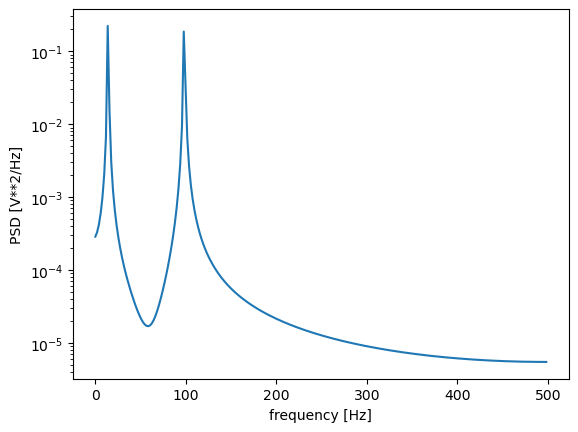

In [4]:
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.semilogy(freq[0:int(N/2)], psd2)

## 6. Power analysis

We analysed a signal composed of two sinusoids. From the spectrum above we can extract frequencies of the components. Let us analyse the peak on the left. First we zoom it in and then integrate the area below the peak. We use trapz function from the scipy library.

Integrated area between 9.765625 and 21.484375 Hz: 0.484839094799374


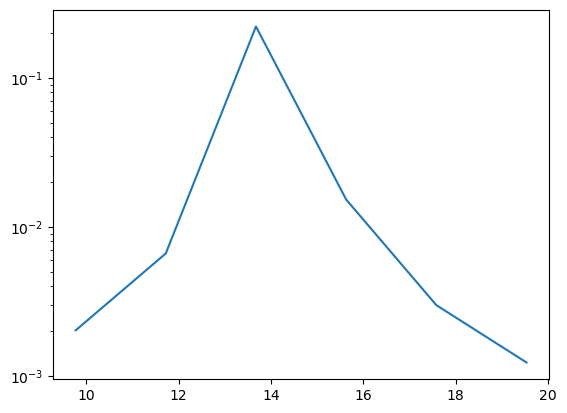

In [5]:
window_start = 5
window_end = 11

plt.semilogy(freq[0:int(N/2)][window_start:window_end], psd2[window_start:window_end])

fft_integr = np.trapz(psd2[window_start:window_end], x=freq[0:int(N/2)][window_start:window_end])

print("Integrated area between " + str(freq[window_start]) + " and " + str(freq[window_end]) + " Hz: "+ str(fft_integr))

The integral of the power spectrum in the specified frequency band is proportional to the power of contributiong frequencies.

We are close enough.

In [6]:
print("measured Vrms = " + str(round(np.sqrt(fft_integr),4)))
print("signal was generated with Vrms = " + str(Vrms))

measured Vrms = 0.6963
signal was generated with Vrms = 0.7071


# 7. Comparision with periodigram

Scipy library provides a comfortable function for power spectral density estimation from sampled data. Its result should be the same to the FFT analysis.

Let us compare its results for the same data we processed above.

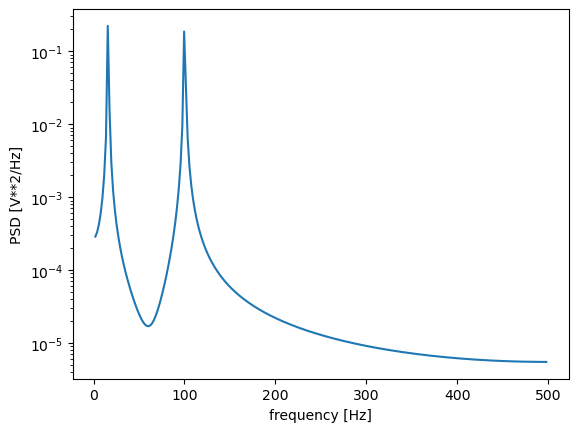

In [7]:
from scipy import signal

f, per = signal.periodogram(our_signal, Fs)  # Function returns two arguments

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.semilogy(f[1:-1], per[1:-1])

Integrated area between 9.77 and 21.48 Hz: 0.48V^2


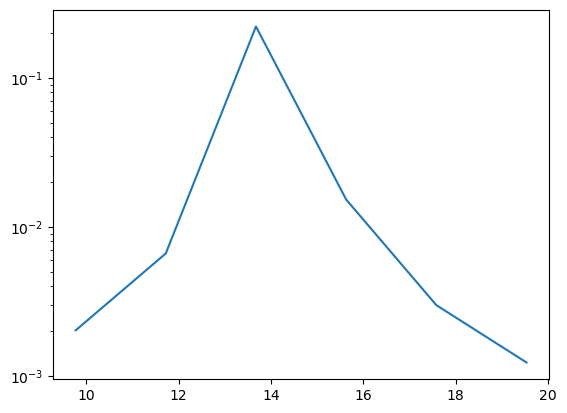

In [8]:
plt.semilogy(freq[0:int(N/2)][window_start:window_end], psd2[window_start:window_end])

per_integr = np.trapz(per[window_start:window_end], x=freq[0:int(N/2)][window_start:window_end])

print("Integrated area between " + str(round(f[window_start],2)) + " and " + str(round(f[window_end],2)) + " Hz: "+ str(round(per_integr,2)) + "V^2")

In [9]:
print("measured Vrms = " + str(round(np.sqrt(per_integr),4)))
print("signal was generated with Vrms = " + str(Vrms))

measured Vrms = 0.6955
signal was generated with Vrms = 0.7071


Note a slight difference between the two methods.

We are close enough!

# Play with parameters to understand better the undelying mechanism!